<a href="https://colab.research.google.com/github/Hoa20146128/AI-Homework/blob/main/memberclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/members of class/Train',target_size=(30,30), batch_size=32, class_mode='categorical')

Found 115 images belonging to 10 classes.


In [ ]:
training_set.class_indices

{'Hoa': 0,
 'TDat': 1,
 'TLoc': 2,
 'Thai': 3,
 'Thang': 4,
 'Thanh': 5,
 'Thao': 6,
 'Thinh': 7,
 'Tien': 8,
 'Trong': 9}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(30,30,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 15, 15, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size) 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1)

Epoch 1/100
4/4 [==============================] - 4s 539ms/step - loss: 2.4985 - accuracy: 0.1304
Epoch 2/100
4/4 [==============================] - 1s 286ms/step - loss: 2.0668 - accuracy: 0.2783
Epoch 3/100
4/4 [==============================] - 1s 253ms/step - loss: 1.8928 - accuracy: 0.3043
Epoch 4/100
4/4 [==============================] - 1s 340ms/step - loss: 1.5034 - accuracy: 0.5217
Epoch 5/100
4/4 [==============================] - 1s 278ms/step - loss: 0.9114 - accuracy: 0.7652
Epoch 6/100
4/4 [==============================] - 1s 358ms/step - loss: 0.6020 - accuracy: 0.8261
Epoch 7/100
4/4 [==============================] - 2s 514ms/step - loss: 0.5756 - accuracy: 0.8696
Epoch 8/100
4/4 [==============================] - 1s 346ms/step - loss: 0.3142 - accuracy: 0.8957
Epoch 9/100
4/4 [==============================] - 1s 298ms/step - loss: 0.2966 - accuracy: 0.8870
Epoch 10/100
4/4 [==============================] - 1s 267ms/step - loss: 0.1293 - accuracy: 0.9739
Epoch 11/

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0021513900719583035
Train Accuracy 1.0


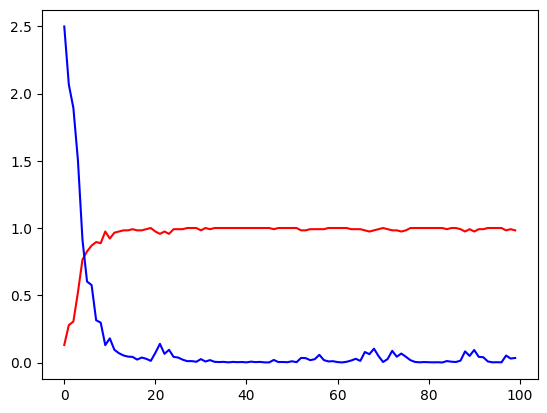

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'r', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.show()

In [ ]:
# Lưu lại
model.save("member.h5")


In [ ]:
# Tải mô hình 
model_CNN=load_model("member.h5")

1/1 [==============================] - 0s 47ms/step
Thanh


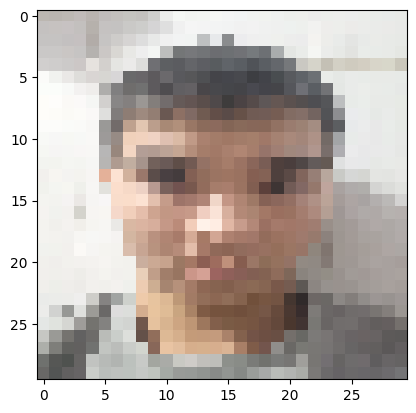

1/1 [==============================] - 0s 26ms/step
Thai


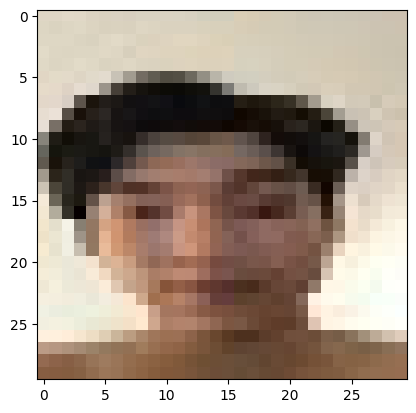

1/1 [==============================] - 0s 26ms/step
TDat


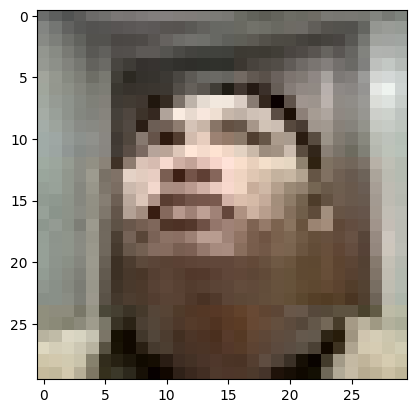

1/1 [==============================] - 0s 26ms/step
Thang


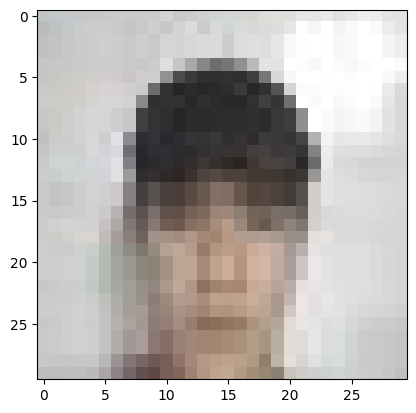

1/1 [==============================] - 0s 38ms/step
TLoc


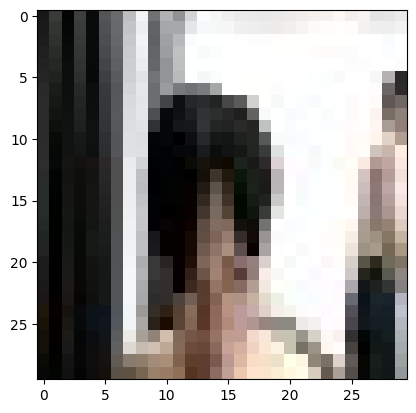

1/1 [==============================] - 0s 37ms/step
Tien


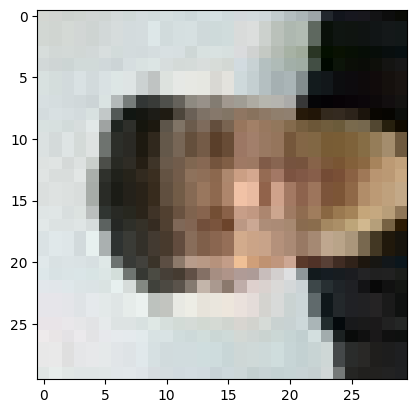

1/1 [==============================] - 0s 42ms/step
Hoa


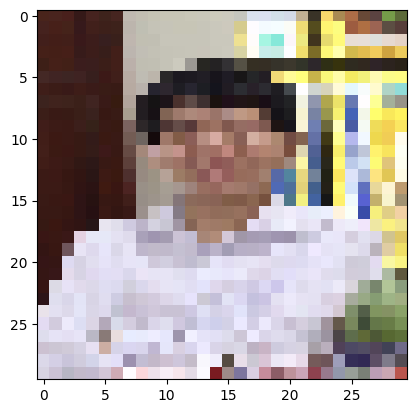

1/1 [==============================] - 0s 38ms/step
Thao


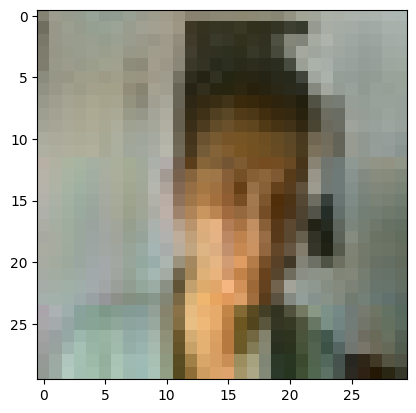

1/1 [==============================] - 0s 43ms/step
Thinh


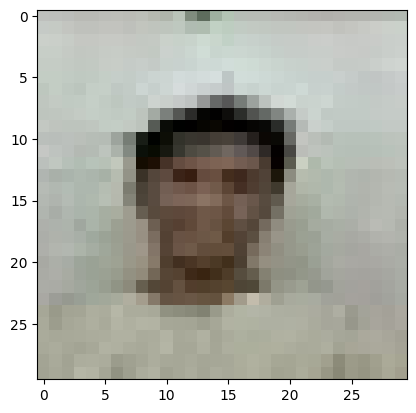

1/1 [==============================] - 0s 56ms/step
Trong


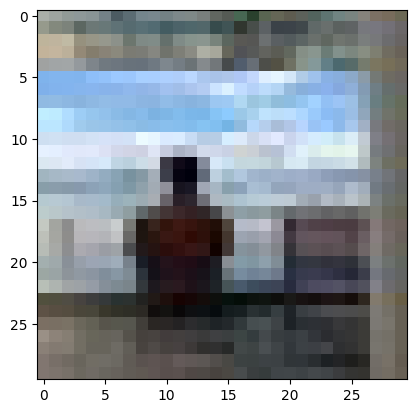

In [ ]:
test= "/content/drive/MyDrive/AI/members of class/Test"
# {'Hoa': 0,
#  'TDat': 1,
#  'TLoc': 2,
#  'Thai': 3,
#  'Thang': 4,
#  'Thanh': 5,
#  'Thao': 6,
#  'Thinh': 7,
#  'Tien': 8,
#  'Trong': 9}
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(30,30))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Hoa'
  if round(result[0][1])==1:
    prediction='TDat'
  if round(result[0][2])==1:
    prediction='TLoc'
  if round(result[0][3])==1:
    prediction='Thai'
  if round(result[0][4])==1:
    prediction='Thang'
  if round(result[0][5])==1:
    prediction='Thanh'
  if round(result[0][6])==1:
    prediction='Thao'
  if round(result[0][7])==1:
    prediction='Thinh'
  if round(result[0][8])==1:
    prediction='Tien'
  if round(result[0][9])==1:
    prediction='Trong'
  print(prediction)
  plt.show()